Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [3]:
print('size of transactions:    {:,}'.format(transactions.size))
print('size of items:           {:,}'.format(items.size))
print('size of item_categories: {:,}'.format(item_categories.size))
print('size of shops:           {:,}'.format(shops.size))

size of transactions:    17,615,094
size of items:           66,510
size of item_categories: 168
size of shops:           120


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
# YOUR CODE GOES HERE
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
transactions['date']= pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [10]:
# YOUR CODE GOES HERE

transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions_result = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month == 9)]
max_revenue = transactions_result.groupby('shop_id')['revenue'].sum().max()

grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [11]:
transactions['date']= pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions_r = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month >= 6 ) & (transactions['date'].dt.month <= 8 )]

transactions_r.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00


In [15]:
transaction_join = pd.merge(transactions_r, items, how='left', on='item_id')
transaction_join.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
0,2014-06-15,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-10,17,26,9507,149.00,1.0,149.00,В ПОИСКАХ НЕМО (регион),40
2,2014-06-13,17,26,9509,246.32,1.0,246.32,В ПОСТЕЛИ С ВРАГОМ (BD),37
3,2014-06-03,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-08,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [16]:
transaction_join = transaction_join.groupby('item_category_id')['revenue'].sum().reset_index(name ='total_revenue')
transaction_join.head()

,item_category_id,total_revenue
0,2,2755520.0
1,3,6854669.8
2,4,38833.2
3,5,418233.1
4,6,3360382.5


In [20]:
# YOUR CODE GOES HERE
item_id = transaction_join['item_category_id'].iloc[transaction_join['total_revenue'].idxmax()]

category_id_with_max_revenue =  item_id # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [25]:
a = transactions.groupby('item_id')['item_price'].nunique()
a.head()

item_id
0    1
1    1
2    1
3    2
4    1
Name: item_price, dtype: int64

In [26]:
# YOUR CODE GOES HERE

num_items_constant_price = ((a == 1).sum())# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [27]:
transactions_r = transactions.loc[(transactions['date'].dt.year == 2014) & (transactions['date'].dt.month == 12 )  & (transactions['shop_id'] == 25)]

transactions_r.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2295837,2014-12-14,23,25,21752,399.0,1.0,399.0
2295838,2014-12-13,23,25,21752,399.0,3.0,1197.0
2295839,2014-12-26,23,25,21733,149.0,1.0,149.0
2295840,2014-12-31,23,25,21732,149.0,1.0,149.0
2295841,2014-12-30,23,25,21726,149.0,1.0,149.0


In [28]:
transactions_r = transactions_r.groupby('date')['item_cnt_day'].sum().reset_index(name ='total_count')

transactions_r.head()

,date,total_count
0,2014-12-01,153.0
1,2014-12-02,169.0
2,2014-12-03,195.0
3,2014-12-04,164.0
4,2014-12-05,300.0


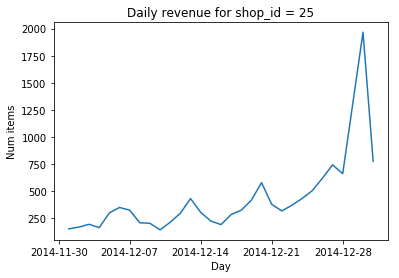

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [31]:
shop_id = 25



total_num_items_sold = transactions_r['total_count']# YOUR CODE GOES HERE
days = transactions_r['date'] # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [33]:
STUDENT_EMAIL = 'brandon.hy.lin.0@gmail.com' # EMAIL HERE
STUDENT_TOKEN = '0RcjLg1t365D5uE1' # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [34]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)